# Fraud Active prediction project

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read a fraud dataset
path = os.getcwd()+'/Candidate_tech_evaluation_candidate_copy_data science_fraud.csv'
df = pd.read_csv(path)

In [3]:
# Read a IP adress
path = os.getcwd()+'/Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx'
IPadress = pd.read_excel(path)

## Get Country information from IP adress

In [4]:
def ip2country(x, IPadress):
   # print(IPadress['country'][
   #    (IPadress['lower_bound_ip_address'] <= x)
   #    & (IPadress['upper_bound_ip_address'] > x)].values[0])
   try:
      country_name = IPadress['country'][
         (IPadress['lower_bound_ip_address'] <= x)
         & (IPadress['upper_bound_ip_address'] > x)].values[0]
   except:
      country_name = 'Unknown'
   return country_name

In [5]:
df['ip_country'] = df['ip_address'].apply(lambda x: ip2country(x, IPadress))

## #1) EDA

### #1-1) Data issue check

In [6]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


In [7]:
# Unnamed: 0 --> This is not include in the data description. So deleted it.
del df['Unnamed: 0']

In [8]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


- Missing value check

In [9]:
# original data shape, delete missing shape
print('original data shape:', df.shape)
print('delete missing data shape:', df.dropna().shape)

original data shape: (120000, 12)
delete missing data shape: (120000, 12)


--> There are no missing values.

- Duplicate value check

In [10]:
# original data shape, duplicate data shape
print('original data shape:', df.shape)
print('duplicate data shape:', df.drop_duplicates().shape)

original data shape: (120000, 12)
duplicate data shape: (120000, 12)


--> There are no duplicate values.

### #1-2) Data visualization

This dataset have a label that 0 and 1. So I did try to visaulzation by label(0, 1).

#### #1-2-1) Plotting by Ratio of Label

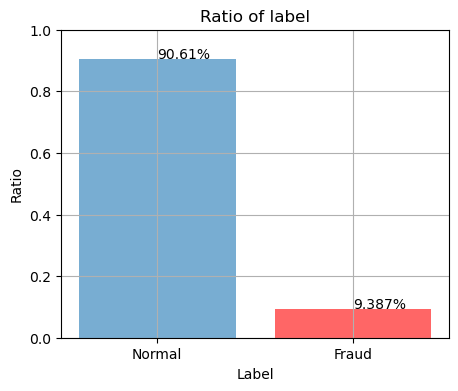

In [11]:
# Counting by label(class)
countlabel = df['class'].value_counts()

# Normalizing for all data
countlabel = countlabel/len(df)
countlabel.rename(
   index={
      0: 'Normal',
      1: 'Fraud'
   },
   inplace=True
)

plt.figure(figsize=(5, 4))
plt.title('Ratio of label')
plt.grid()
plt.bar(countlabel.index, countlabel, color=['C0', 'r'], alpha=.6)
for i, y in enumerate(countlabel):
   plt.text(countlabel.index[i], y, str(y*100)[:5]+'%')
plt.xlabel('Label')
plt.ylabel('Ratio')
plt.ylim(0, 1)
plt.show()

- This dataset has data imbalance.
- Ratio is about 10:1.
- If when I try test, need to watch this status.

##### purchase time visualization by label

#### #1-2-2) Plotting by about time

In [12]:
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [13]:
df['purchase_day_of_week'] = df['purchase_time'].apply(lambda x: x.day_name())

In [14]:
def plotting_all_EachLabel(df=df, col='purchase_day_of_week', text=True, top10_ranking=False):
   # Counting by label(class)
   countlabel = df[col].value_counts()
   # Normalizing for all data
   countlabel = countlabel/len(df)

   if top10_ranking==True:
      countlabel = df[col].value_counts()[:10]
      countlabel = countlabel/len(df)

   # fig, ax = plt.subplots(2, 2, figsize=(9, 9))
   fig = plt.figure(figsize=(20,11))
   gs = fig.add_gridspec(2, 2)

   # Plotting all dataset
   ax0 = fig.add_subplot(gs[0, :])
   ax0.set_title(f'All data ratio about ({col})')
   ax0.grid()
   ax0.bar(countlabel.index, countlabel, color=[f'C{x}' for x in np.arange(0, len(countlabel))], alpha=.6)
 
   colorlist = {}
   for i, key in enumerate(countlabel.index):
      colorlist[key] = f'C{i}'

   if text:
      for i, y in enumerate(countlabel):
         ax0.text(countlabel.index[i], y, str(y*100)[:4]+'%', fontsize=15)
   else: 
      pass
   # ax0.set_ylim(0, 0.2)
   ax0.set_xlabel('Label')
   ax0.set_ylabel('Ratio')
   ax0.tick_params(labelrotation=15)

   # Plotting normal
   df_label = df[df['class']==0]
   countlabel = df_label[col].value_counts()
   countlabel = countlabel/len(df_label)
   if top10_ranking==True:
      countlabel = df_label[col].value_counts()[:10]
      countlabel = countlabel/len(df_label)
   ax1 = fig.add_subplot(gs[1, 0])
   ax1.set_title('Normal data')
   ax1.grid()
   colors = [colorlist[x] for x in countlabel.index]
   ax1.bar(countlabel.index, countlabel, color=colors, alpha=.6)
   if text:
      for i, y in enumerate(countlabel):
         ax1.text(countlabel.index[i], y, str(y*100)[:4]+'%', fontsize=15)
   else:
      pass
   # ax1.set_ylim(0, 0.2)
   ax1.set_xlabel('Label')
   ax1.set_ylabel('Ratio')
   ax1.tick_params(labelrotation=15)

   # Plotting Fraud
   df_label = df[df['class']==1]
   countlabel = df_label[col].value_counts()
   countlabel = countlabel/len(df_label)
   if top10_ranking==True:
      countlabel = df_label[col].value_counts()[:10]
      countlabel = countlabel/len(df_label)
   ax2 = fig.add_subplot(gs[1, 1])
   ax2.set_title('Fraud data')
   ax2.grid()
   colors = [colorlist[x] for x in countlabel.index]
   ax2.bar(countlabel.index, countlabel, color=colors, alpha=.6)
   if text:
      for i, y in enumerate(countlabel):
         ax2.text(countlabel.index[i], y, str(y*100)[:4]+'%', fontsize=15)
   else:
      pass
   ax2.set_xlabel('Label')
   ax2.set_ylabel('Ratio')
   ax2.tick_params(labelrotation=15)

   plt.show()

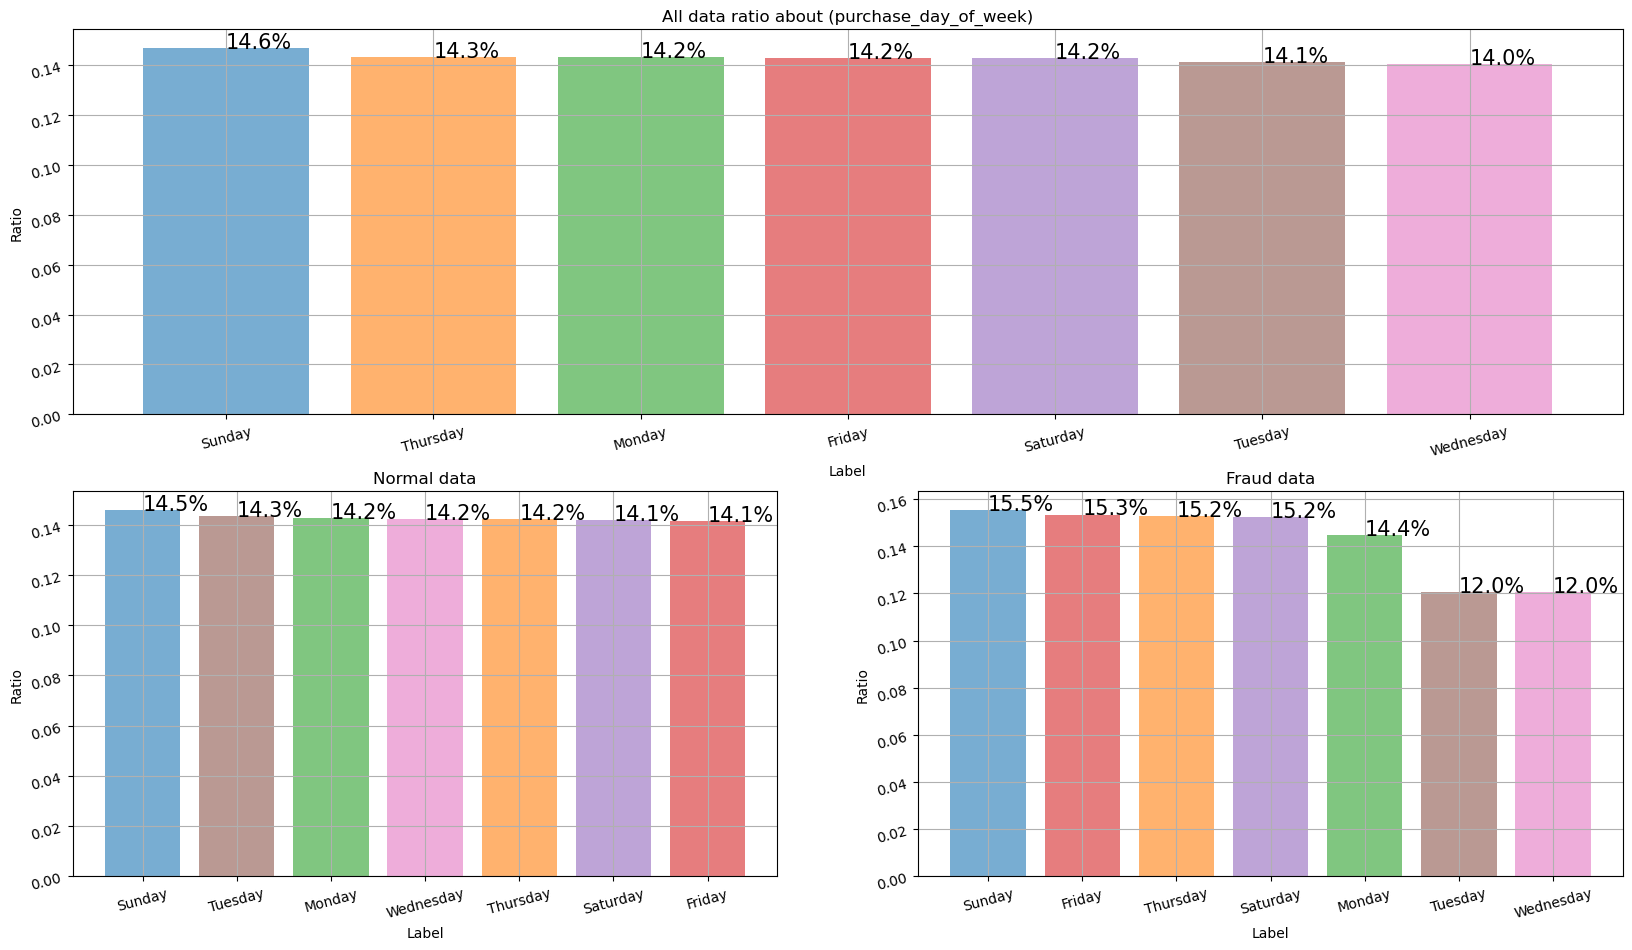

In [15]:
plotting_all_EachLabel(df=df, col='purchase_day_of_week', text=True)

Totally, no clear difference appears between ratio of week about normal and fraud.</br>
But, overall in fraud data, It has a little more fraud active in Thursday~Sunday.

#### #1-2-3) Plotting by period of day

In [16]:
def period_of_day(x):
   x = x.hour
   if   (x >=0) & (x < 3):   period = '00h-03h'
   elif (x >=3) & (x < 6):   period = '03h-06h'
   elif (x >=6) & (x < 9):   period = '06h-09h'
   elif (x >=9) & (x < 12):  period = '09h-12h'
   elif (x >=12) & (x < 15): period = '12h-15h'
   elif (x >=15) & (x < 18): period = '15h-18h'
   elif (x >=18) & (x < 21): period = '18h-21h'
   elif (x >=21) :           period = '21h-24h'
   return period

In [17]:
df['purchase_period_of_day'] = df['purchase_time'].apply(lambda x: period_of_day(x))

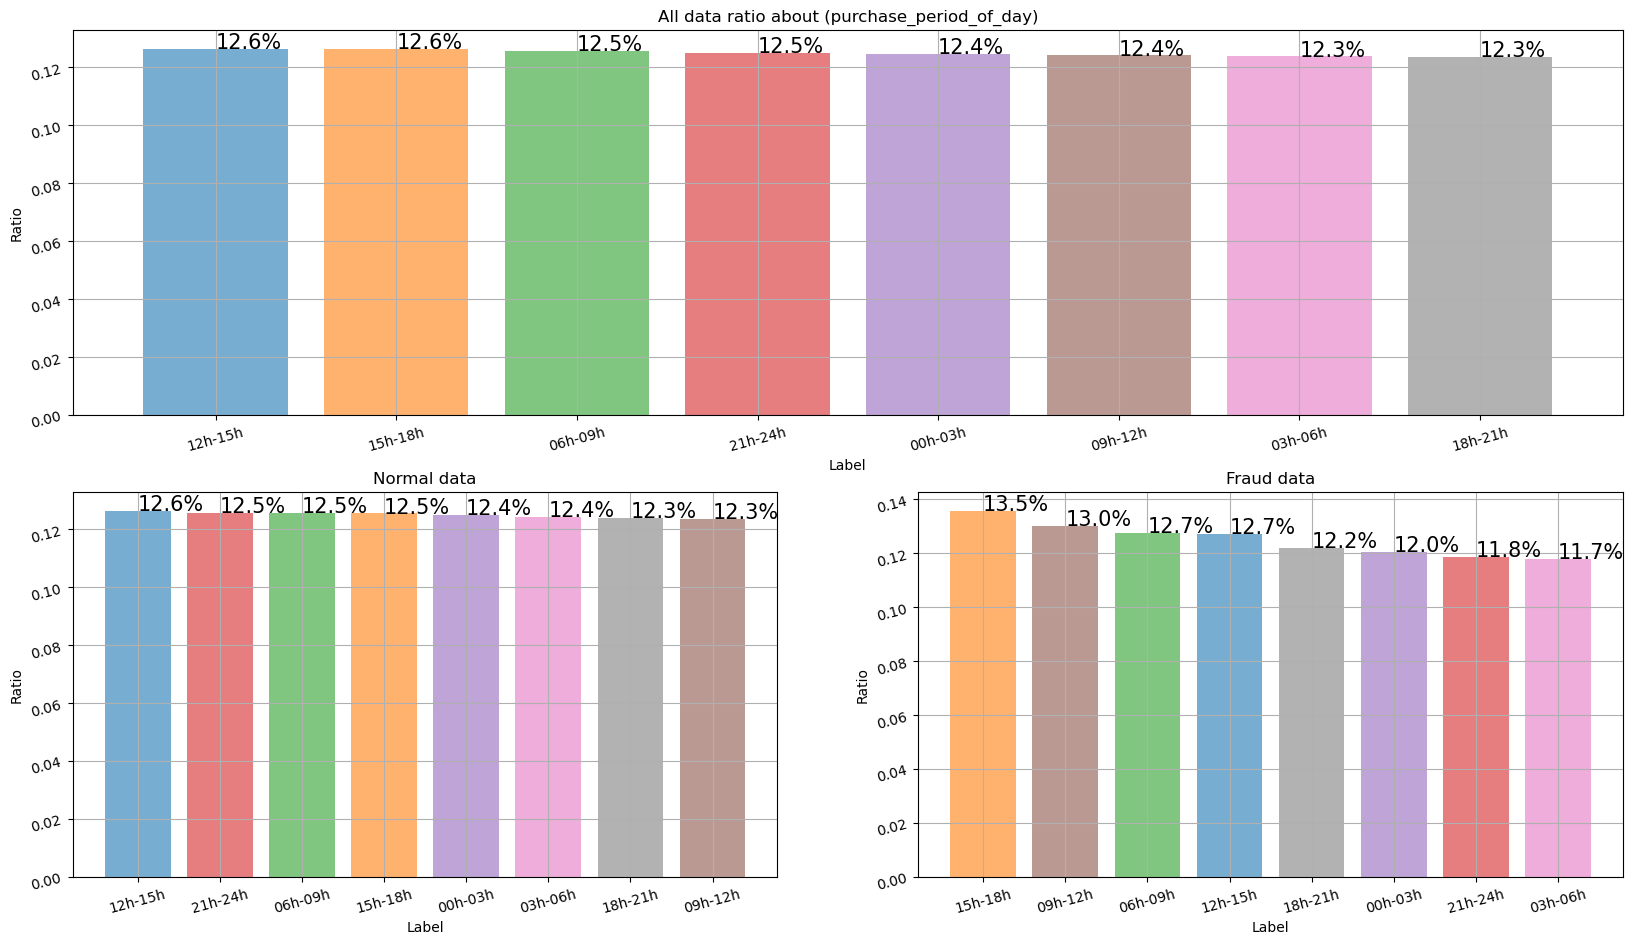

In [18]:
plotting_all_EachLabel(df=df, col='purchase_period_of_day', text=True)

Totally, no clear difference appears between period of day about normal and fraud.</br>
But, overall in fraud data, It has a little more fraud active in 06:00~18:00.

In [19]:
def month_of_day(x):
   x = x.month
   if   x==1:    month = 'January'
   elif x==2:    month = 'February'
   elif x==3:    month = 'March'
   elif x==4:    month = 'April'
   elif x==5:    month = 'May'
   elif x==6:    month = 'June'
   elif x==7:    month = 'July'
   elif x==8:    month = 'August'
   elif x==9:    month = 'September'
   elif x==10:   month = 'October'
   elif x==11:   month = 'November'
   elif x==12:   month = 'December'
   return month

In [20]:
df['purchase_month_of_day'] = df['purchase_time'].apply(lambda x: month_of_day(x))

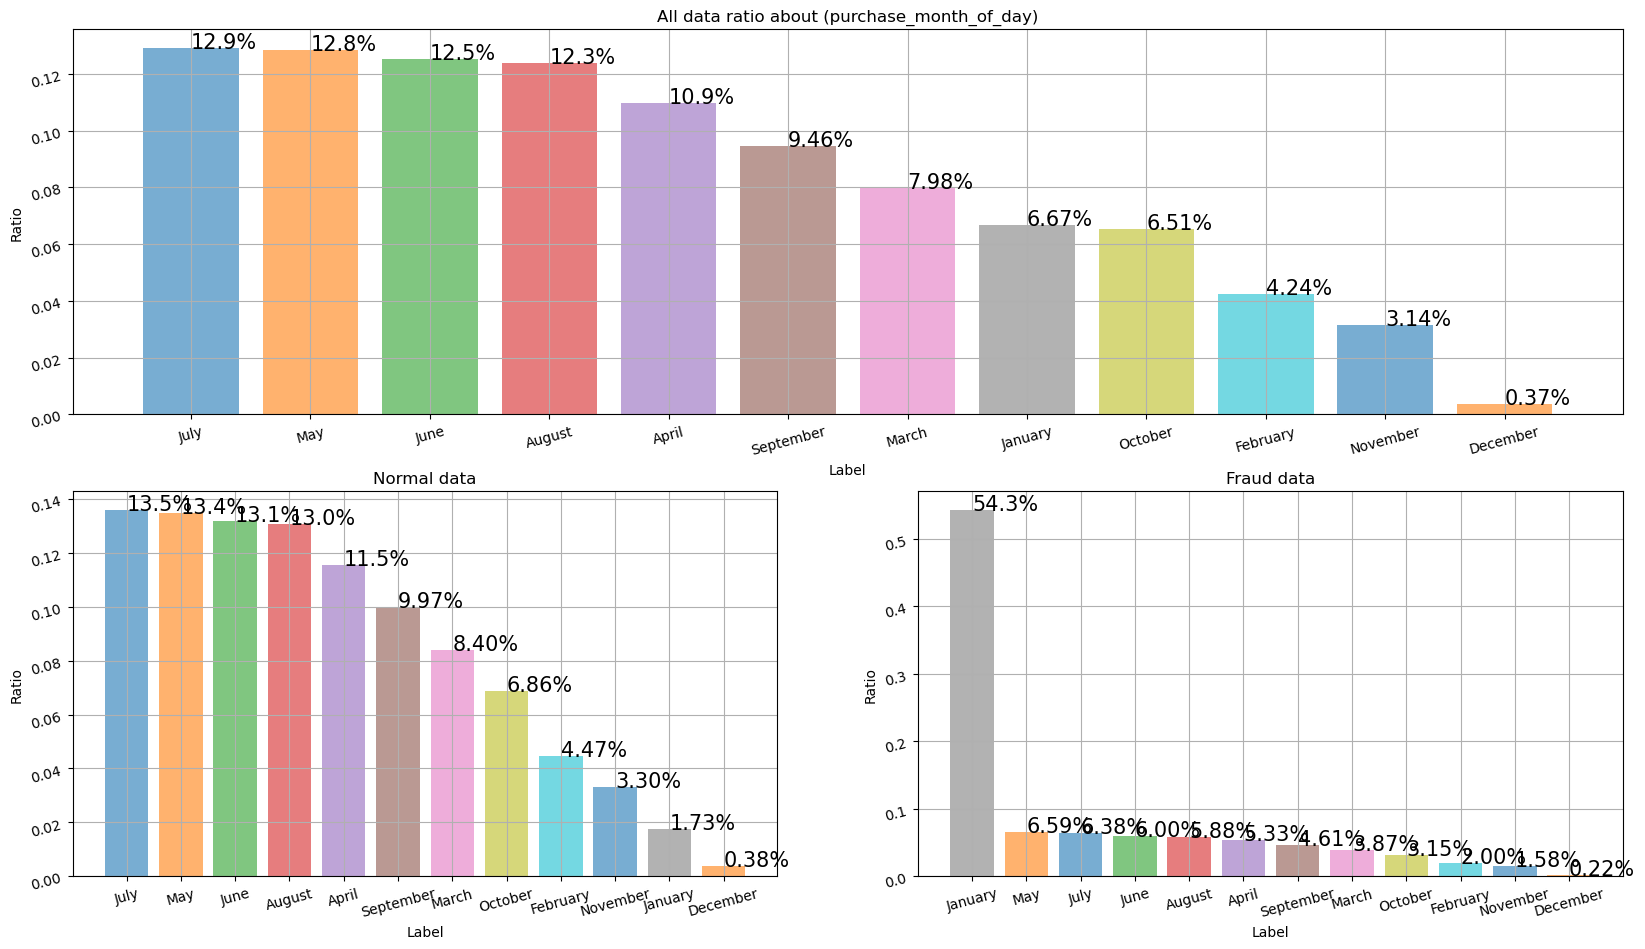

In [21]:
plotting_all_EachLabel(df=df, col='purchase_month_of_day', text=True)

Totally, clear difference appears between period of day about normal and fraud.</br>
In January, Almost fraud occurred in that period.

#### #1-2-4) Plotting by purchase value

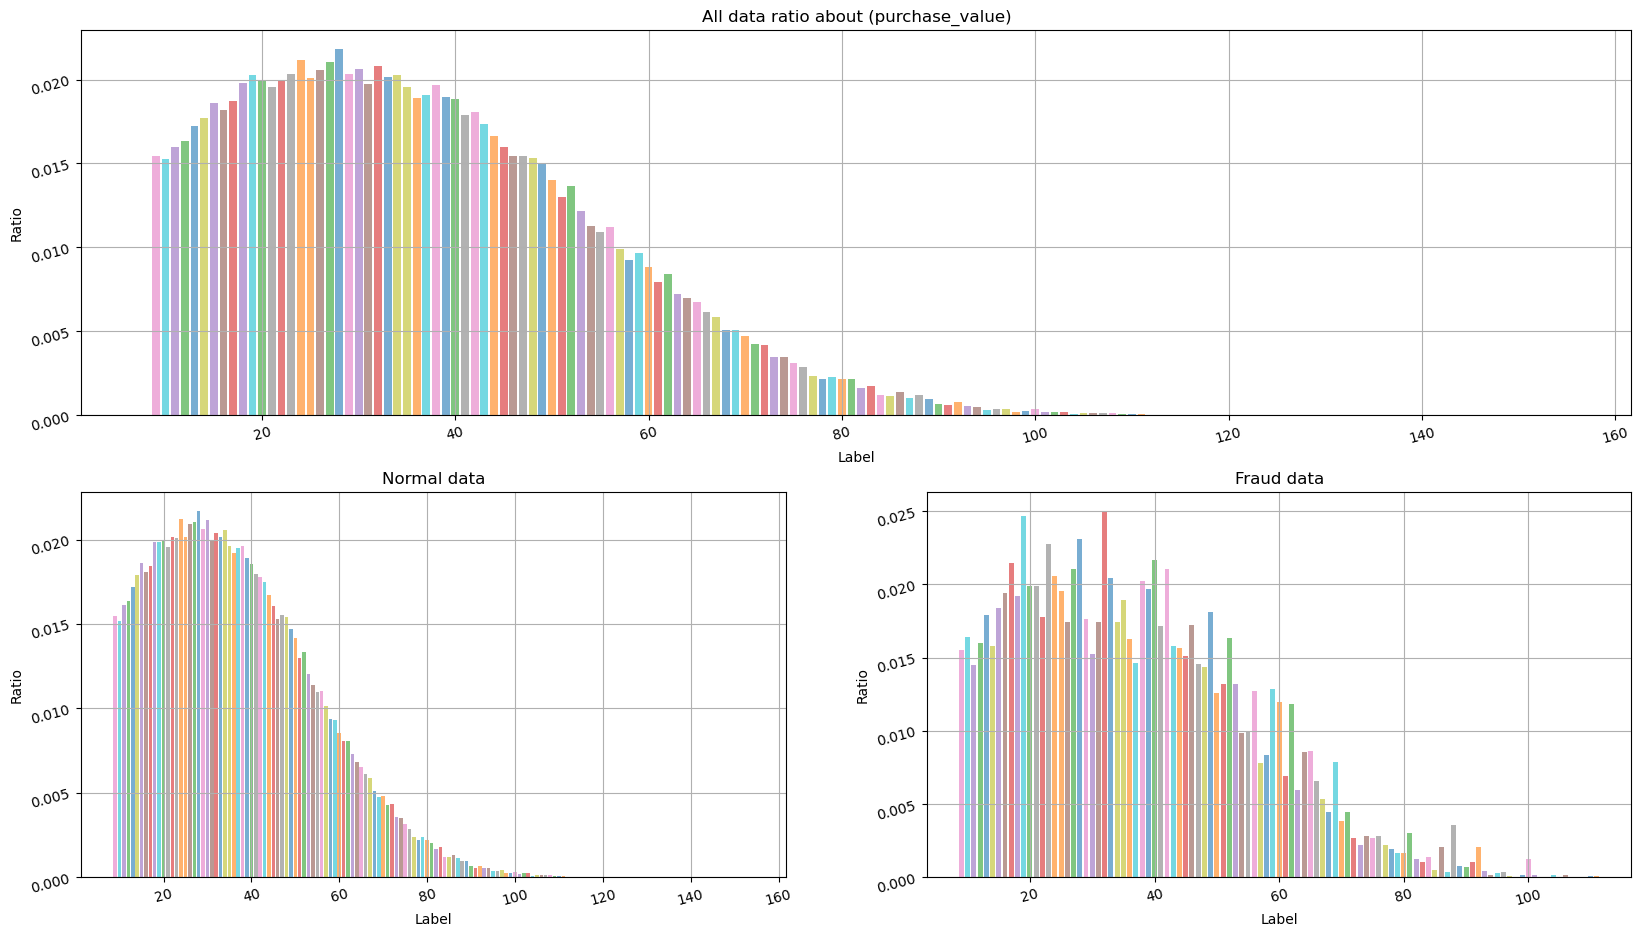

In [22]:
plotting_all_EachLabel(df=df, col='purchase_value', text=False)

In fraud data, There is no high purchase value(upper than 100..).</br>
Some purchase values looks abnormal ratio.</br>
So I think that this pattern meaning is that some bad guys have duplicate purchase that device.

In [23]:
def Section_PurchaseValue(x):
   if   x < 20:                purchase_value = '<20'
   elif (x >=20) & (x < 30):   purchase_value = '<30'
   elif (x >=30) & (x < 40):   purchase_value = '<40'
   elif (x >=40) & (x < 50):   purchase_value = '<50'
   elif (x >=50) & (x < 60):   purchase_value = '<60'
   elif (x >=60) & (x < 70):   purchase_value = '<70'
   elif (x >=70) & (x < 80):   purchase_value = '<80'
   elif (x >=80) & (x < 90):   purchase_value = '<90'
   elif (x >=90) & (x < 100):  purchase_value = '<100'
   elif (x >=100):             purchase_value = '>=100'
   return purchase_value

In [24]:
df['purchase_value_section'] = df['purchase_value'].apply(lambda x: Section_PurchaseValue(x))

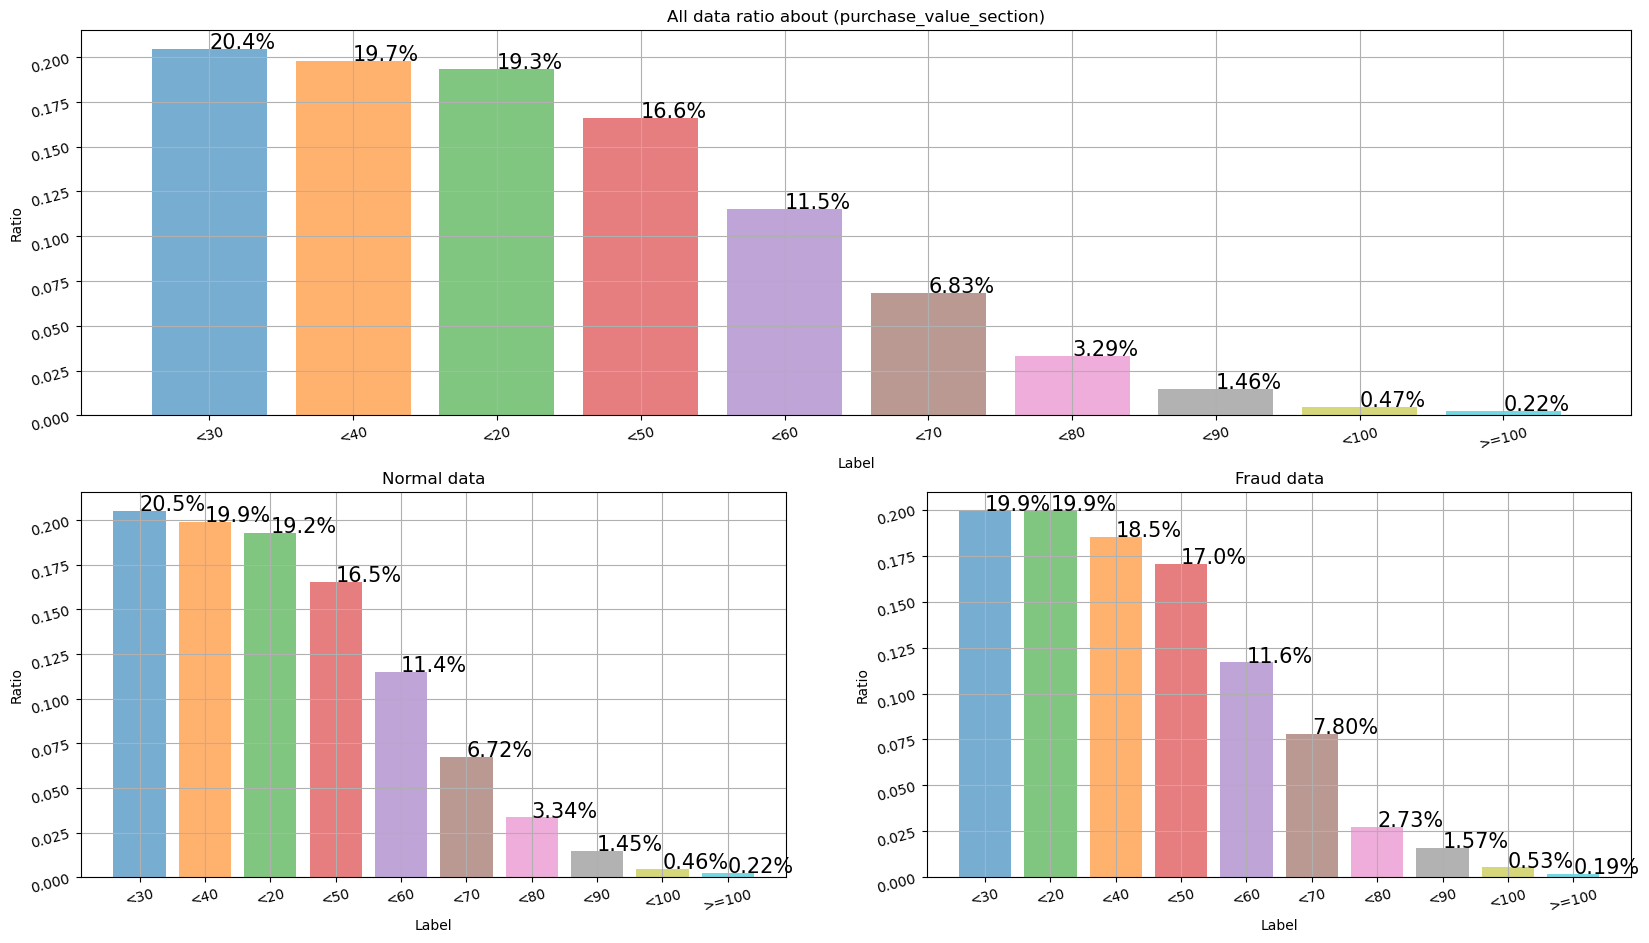

In [25]:
plotting_all_EachLabel(df=df, col='purchase_value_section', text=True)

#### #1-2-5) Plotting by device_id

In [26]:
df['device_id'].value_counts()

ITUMJCKWEYNDD    19
EQYVNEGOFLAWK    17
KIPFSCNUGOLDP    17
ZUSVMDEZRBDTX    17
CDFXVYHOIHPYP    16
                 ..
SFUFOLUGRMMWP     1
BWDGHOPVGJWLB     1
LNGQQAZRZRIAR     1
UHNLCKDJXTAVO     1
BJDWRJULJZNOV     1
Name: device_id, Length: 110599, dtype: int64

In #1-2-4, I thought that some fraud acting guys have duplicate purchase that device.</br>
As above, some device id show number that upper than 1.

In [27]:
duplicate_device = df['device_id'].value_counts()[df['device_id'].value_counts() >= 2].index.tolist()

In [28]:
import tqdm
duplicate_device_idx = []
for device in tqdm.tqdm(duplicate_device):
   idx = df[df['device_id']==device].index.tolist()
   duplicate_device_idx.extend(idx)
duplicate_device_idx = np.array(duplicate_device_idx)
duplicate_device_idx = np.unique(duplicate_device_idx)

100%|██████████| 4213/4213 [00:15<00:00, 266.25it/s]


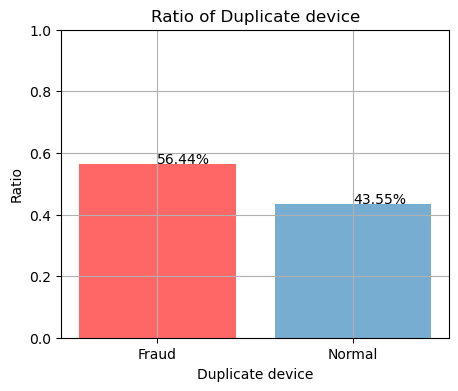

In [29]:
# Counting by label(class)
countlabel = df['class'].loc[duplicate_device_idx].value_counts()

# Normalizing for all data
countlabel = countlabel/len(duplicate_device_idx)
countlabel.rename(
   index={
      0: 'Normal',
      1: 'Fraud'
   },
   inplace=True
)

plt.figure(figsize=(5, 4))
plt.title('Ratio of Duplicate device')
plt.grid()
plt.bar(countlabel.index, countlabel, color=['r', 'C0'], alpha=.6)
for i, y in enumerate(countlabel):
   plt.text(countlabel.index[i], y, str(y*100)[:5]+'%')
plt.xlabel('Duplicate device')
plt.ylabel('Ratio')
plt.ylim(0, 1)
plt.show()

In the ratio of duplicate device, fraud ratio is lager than normal ratio.</br>
It means that fraud acting is frequently occurred in duplicate device. 

In [30]:
# Duplicate device counts
device_counts = df['device_id'].value_counts()

# Add feature that duplicate count by each device
df['Duplicate_device_counts']=1
for device in tqdm.tqdm(duplicate_device):
   idx   = df[df['device_id']==device].index.tolist()
   count = device_counts[device]
   df['Duplicate_device_counts'].loc[idx] = count

100%|██████████| 4213/4213 [00:17<00:00, 247.79it/s]


#### #1-2-6) Plotting by Source

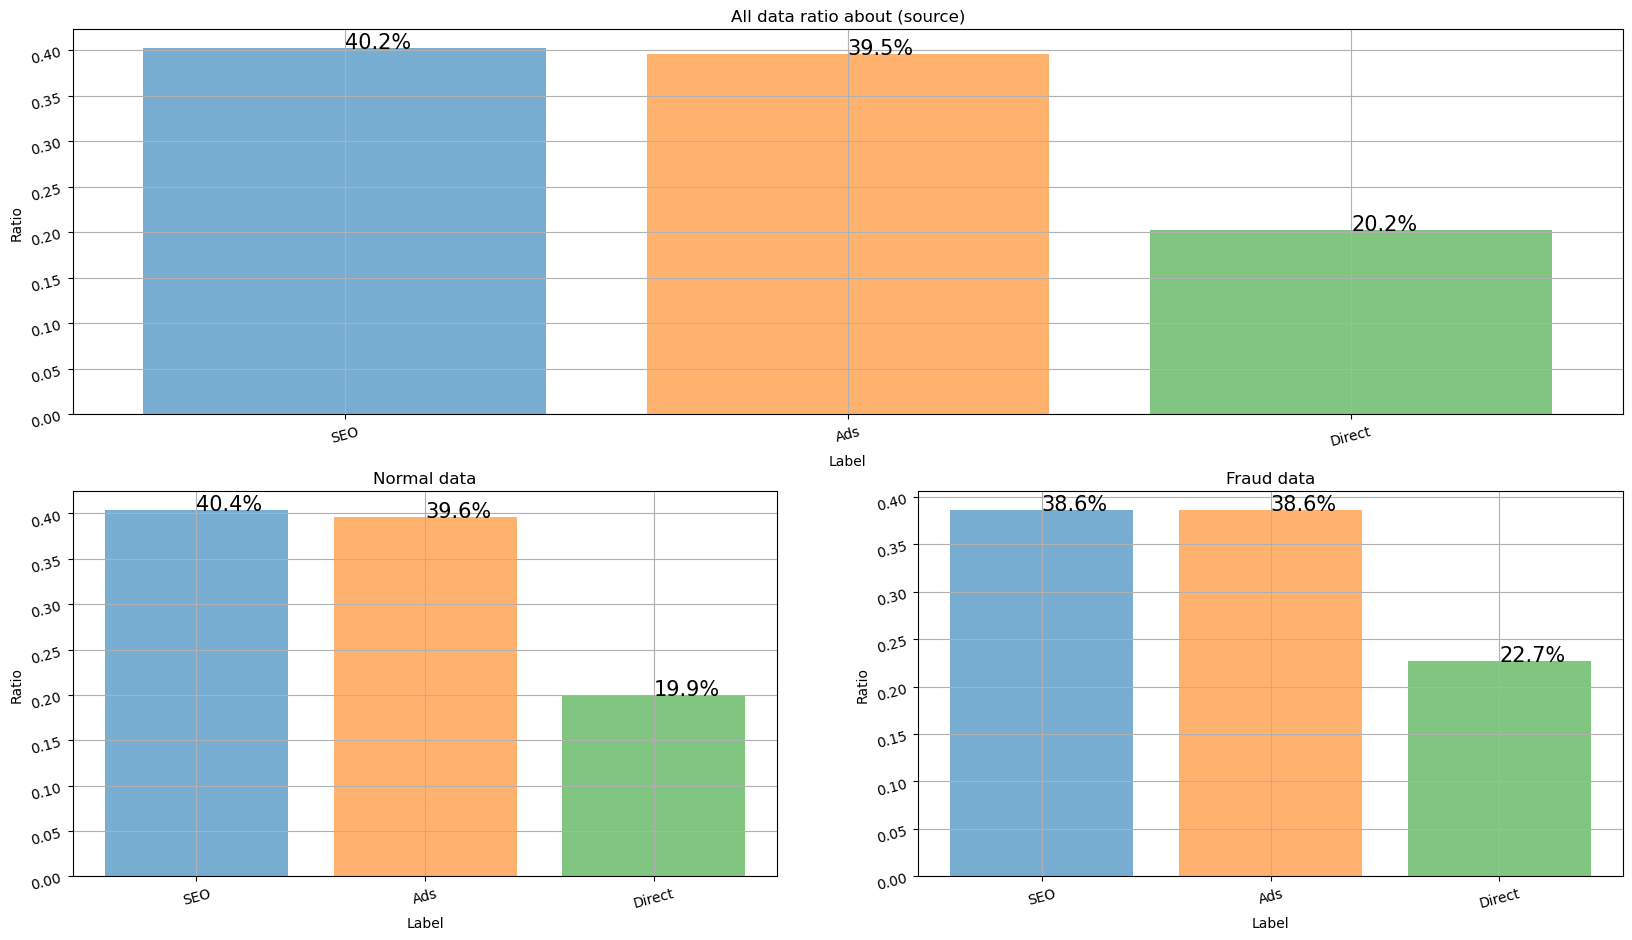

In [31]:
plotting_all_EachLabel(df=df, col='source', text=True)

Totally, no clear difference appears between period of day about normal and fraud.</br>

#### #1-2-7) Plotting by sex

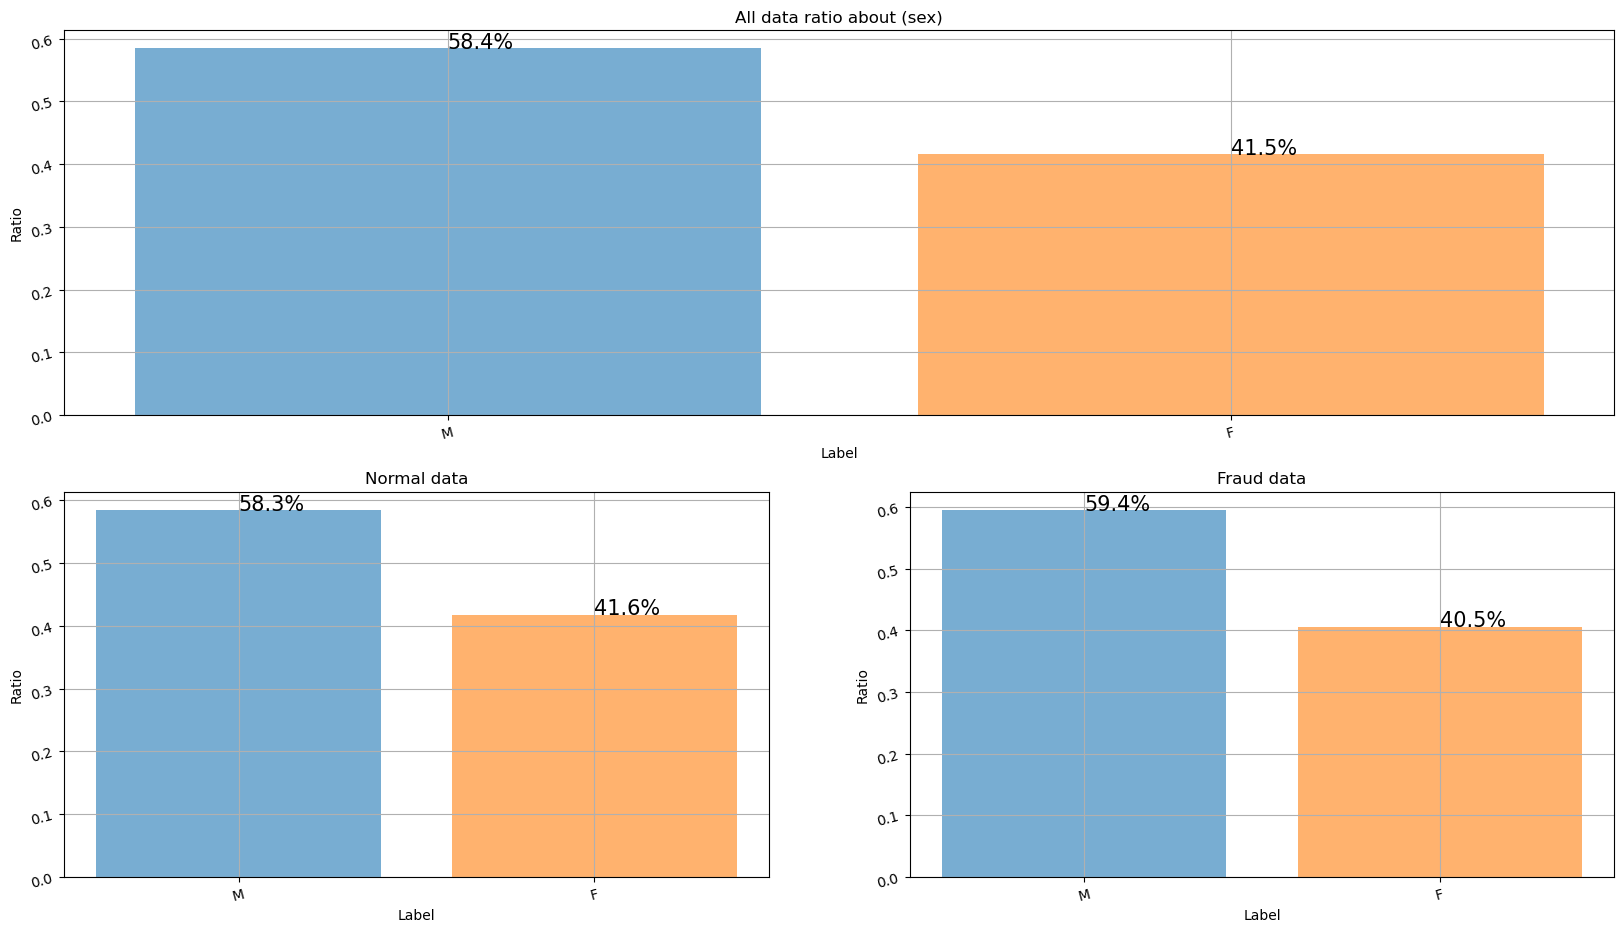

In [32]:
plotting_all_EachLabel(df=df, col='sex', text=True)

Totally, no clear difference appears between period of day about normal and fraud.</br>

#### #1-2-8) Plotting by age

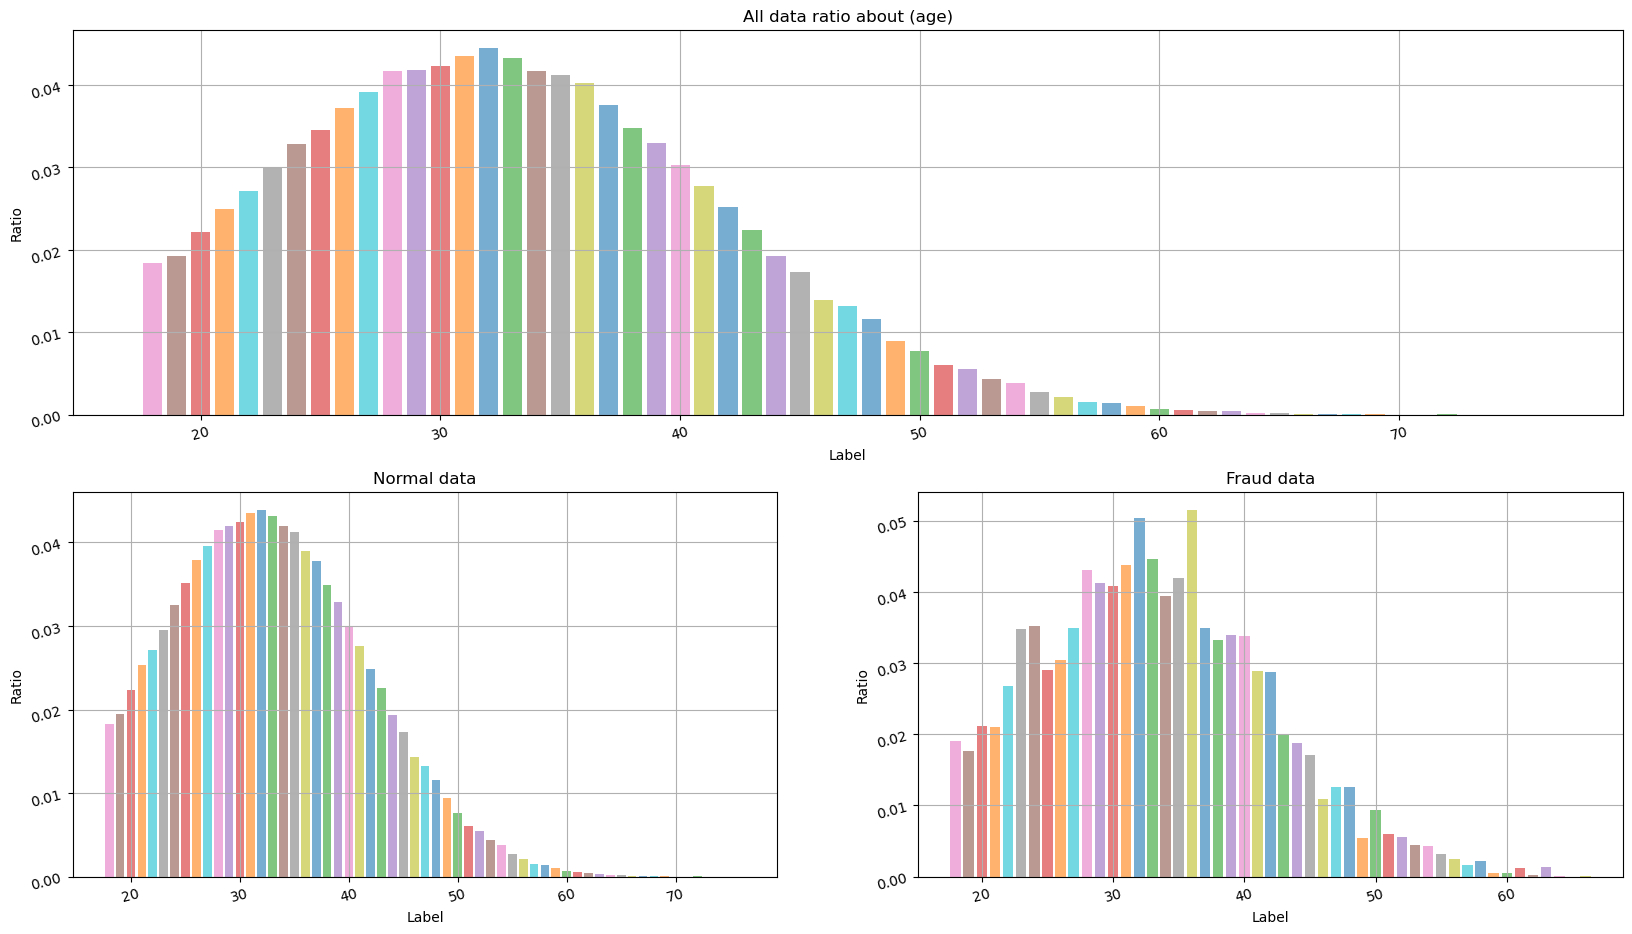

In [33]:
plotting_all_EachLabel(df=df, col='age', text=False)

In fraud data, There is no large age(upper than 60..).</br>
Some range of age(30~40) looks abnormal ratio.

In [34]:
def Section_age(x):
   if   x < 20:                age = '<20'
   elif (x >=20) & (x < 25):   age = '20-25'
   elif (x >=25) & (x < 30):   age = '25-30'
   elif (x >=30) & (x < 35):   age = '30-35'
   elif (x >=35) & (x < 40):   age = '35-40'
   elif (x >=40) & (x < 45):   age = '40-45'
   elif (x >=45) & (x < 50):   age = '45-50'
   elif (x >=50) & (x < 55):   age = '50-55'
   elif (x >=55) & (x < 60):   age = '55-60'
   elif (x >=60):              age = '>60'
   return age

In [35]:
df['age_section'] = df['age'].apply(lambda x: Section_age(x))

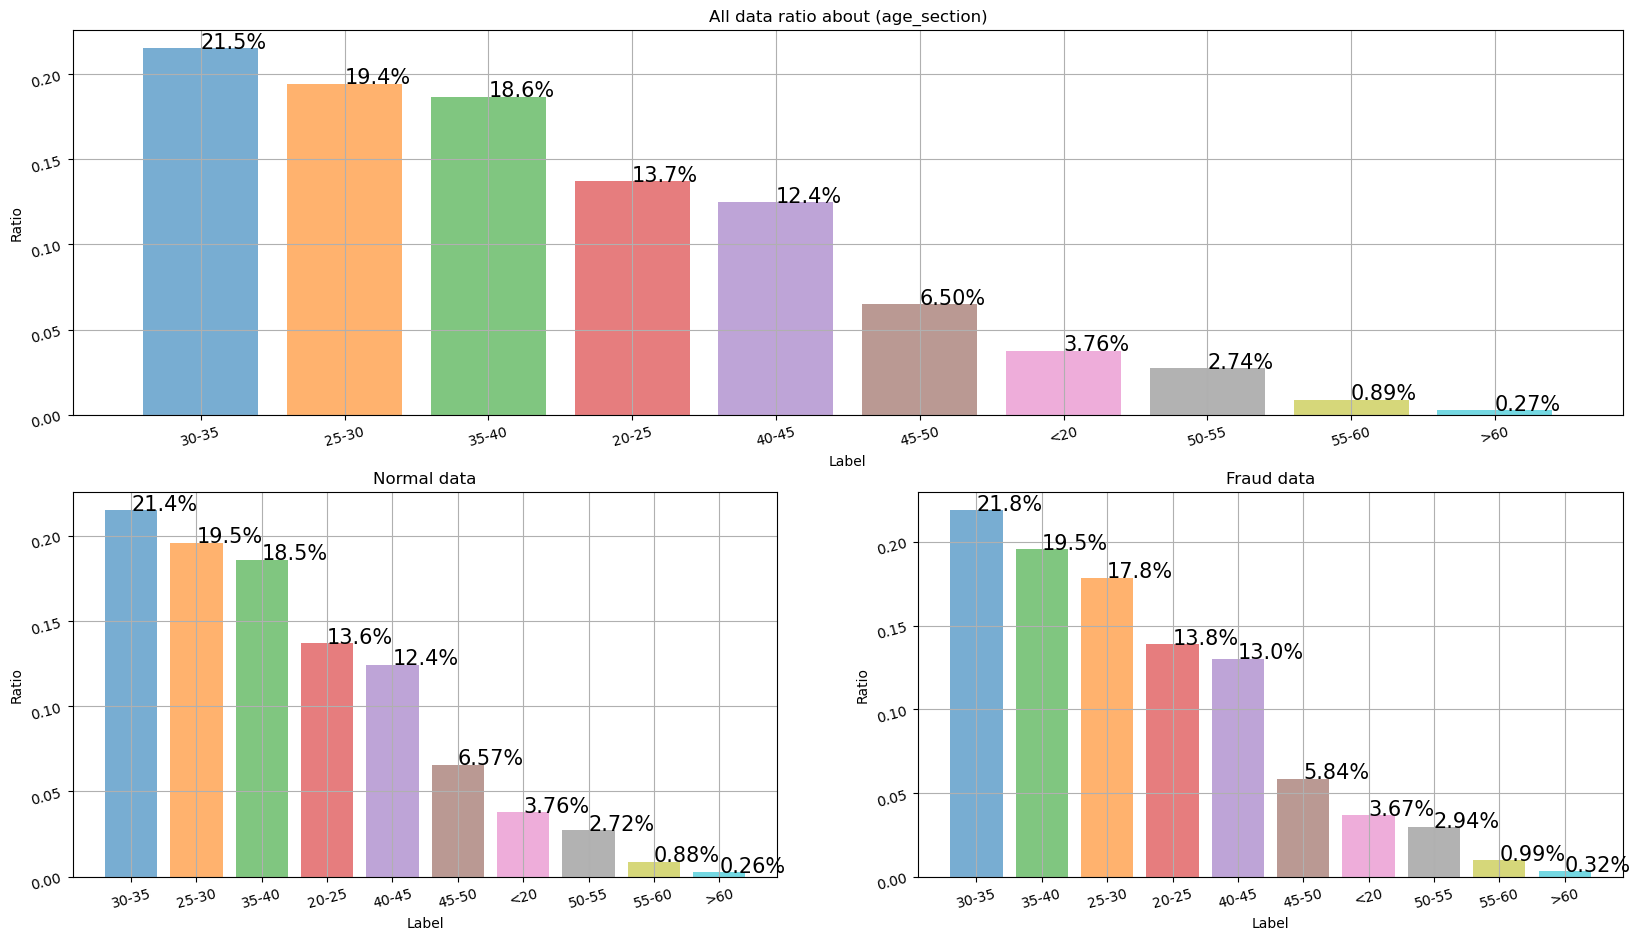

In [36]:
plotting_all_EachLabel(df=df, col='age_section', text=True)

#### #1-2-9) Plotting by Country

It has a lot of country, So I showed top 10 country.

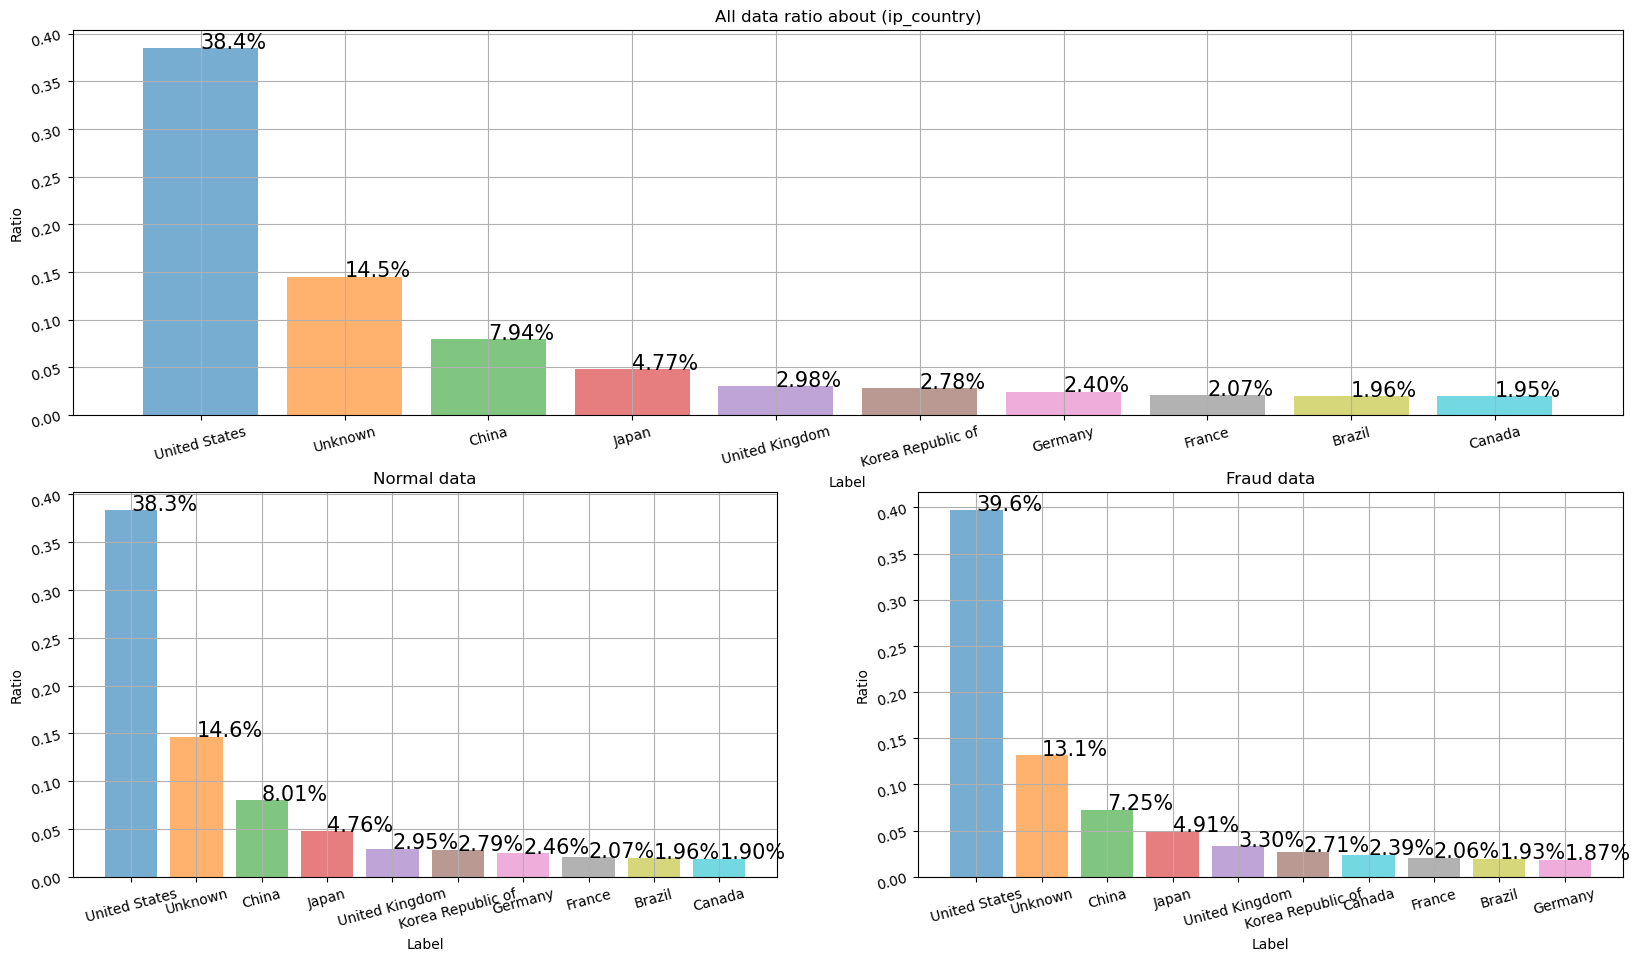

In [37]:
plotting_all_EachLabel(df=df, col='ip_country', text=True, top10_ranking=True)

Overall, United States ratio is the largest ratio of all country.</br>
But, All country number is so large. So I try to transform by ratio.

In [38]:
def Section_country(x):
   if   x == 'United States':                            coutry_section = 'High Risk'
   elif x=='Unknown':                                    coutry_section = 'Middle Risk'
   elif (x=='China')|(x=='Japan')|(x=='United Kingdom'): coutry_section = 'Lower Risk'
   else:                                                 coutry_section = 'Little Risk'
   return coutry_section

In [39]:
df['ip_country_section'] = df['ip_country'].apply(lambda x: Section_country(x))

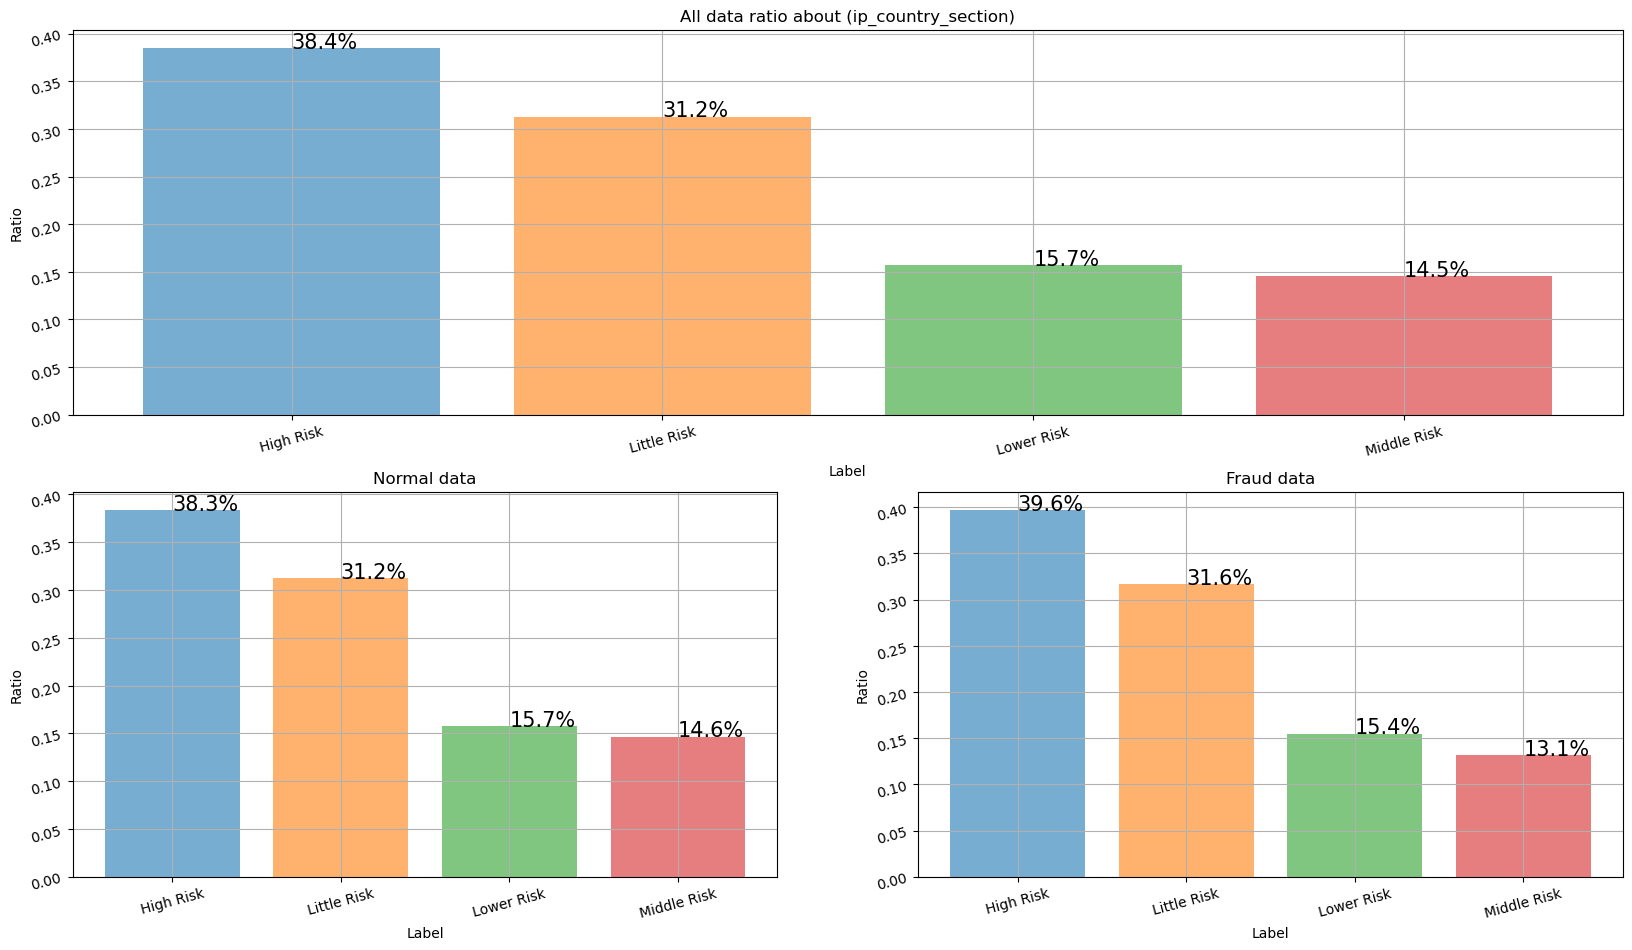

In [40]:
plotting_all_EachLabel(df=df, col='ip_country_section', text=True)

## #2) Data preprocessing for test

In [41]:
# Copy data for test
df_copy = df.copy()

In [42]:
# Filtering columns for test. Almost columns is that extract feature engineering.
use_columns = df_copy.columns[10:]
df_copy = df_copy[use_columns]
del df_copy['ip_country'] # It has a lot of element. So deleted it.

In [43]:
df_copy.head()

,class,purchase_day_of_week,purchase_period_of_day,purchase_month_of_day,purchase_value_section,Duplicate_device_counts,age_section,ip_country_section
0,0,Thursday,12h-15h,September,<40,2,45-50,High Risk
1,0,Monday,03h-06h,April,<40,1,20-25,Lower Risk
2,0,Sunday,12h-15h,April,<20,1,25-30,High Risk
3,0,Friday,09h-12h,January,<30,1,30-35,Little Risk
4,0,Thursday,12h-15h,April,<30,1,30-35,Little Risk


#### #2-1) Transform string value to number

In [44]:
def value_trainsform(x_list):
   transform_dict = {}
   x_unique = np.unique(x_list)
   for i, v in enumerate(x_unique):
      transform_dict[v] = i+1
   return transform_dict

def Apply_value_transform(x, transform_dict):
   return x.apply(lambda x: transform_dict[x])

In [45]:
column_transform_dict={}
for col in df_copy.columns[1:]:
   transform_dict = value_trainsform(df_copy[col])
   column_transform_dict[col] = transform_dict
   df_copy[col] = Apply_value_transform(df_copy[col], transform_dict)

In [46]:
df_copy.head()

,class,purchase_day_of_week,purchase_period_of_day,purchase_month_of_day,purchase_value_section,Duplicate_device_counts,age_section,ip_country_section
0,0,5,5,12,4,2,6,1
1,0,2,2,1,4,1,1,3
2,0,4,5,1,2,1,2,1
3,0,1,4,5,3,1,3,2
4,0,5,5,1,3,1,3,2


#### #2-2) Define Training dataset

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X = df_copy[df_copy.columns[1:]].values
Y = df_copy['class']
def db_prepare(X, Y):
   std_scr = StandardScaler()
   X_ = std_scr.fit_transform(X)

   X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.2, random_state=42)

   X_train = X_train.reshape(X_train.shape[0], -1)
   X_test = X_test.reshape(X_test.shape[0], -1)
   return X_train, X_test, y_train, y_test

In [49]:
X_train, X_test, y_train, y_test = db_prepare(X, Y)

## #3) Model Setting

#### #3-1-1) [Model1] Logistic regression with data imbalance

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [51]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=42)

In [52]:
def metric_result(y_test, y_pred):
   accuracy = accuracy_score(y_test, y_pred)
   precision, recall, fscore, __  = precision_recall_fscore_support(y_test, y_pred)
   print('Accuracy:', str(accuracy*100)[:5]+'%')
   print('Normal class result')
   print('--- Precision:', str(precision[0]*100)[:5]+'%')
   print('--- Recall:',    str(recall[0]*100)[:5]+'%')
   print('--- Fscore:',    str(fscore[0]*100)[:5]+'%')
   print('Fraud class result')
   print('--- Precision:', str(precision[1]*100)[:5]+'%')
   print('--- Recall:',    str(recall[1]*100)[:5]+'%')
   print('--- Fscore:',    str(fscore[1]*100)[:5]+'%')

In [53]:
y_pred   = lr_model.predict(X_test)
metric_result(y_test, y_pred)

Accuracy: 94.97%
Normal class result
--- Precision: 95.11%
--- Recall: 99.57%
--- Fscore: 97.29%
Fraud class result
--- Precision: 92.32%
--- Recall: 50.08%
--- Fscore: 64.94%


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import itertools

In [55]:
# function of plotting confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

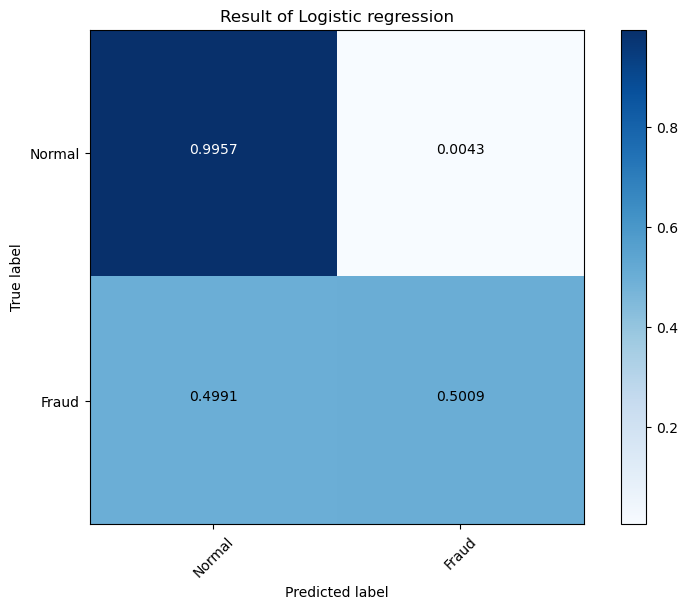

In [56]:
cm = confusion_matrix(y_test, lr_model.predict(X_test), normalize='true')
title = 'Result of Logistic regression'
plot_confusion_matrix(cm, ['Normal', 'Fraud'], title=title)
plt.close()

Conclusion about Logistic regression </br>
- It shows that there is a large difference in performance between Normal and Fraud class.
- I think that this issue related with data imbalance.

#### #3-1-2) [Model1] Logistic regression with Upsampling for data imbalance

In [57]:
# SMOTE is algorithm about data imbalance
from imblearn.over_sampling import SMOTE

In [58]:
def SMOTE_data(X, Y):
   # Define algorithm model about data imbalance
   oversample = SMOTE()
   y = Y.values
   x, y = oversample.fit_resample(X, y)
   return x, y

In [59]:
print('Before Data balance---\n', Y.value_counts())
x, y = SMOTE_data(X, Y)
print('After Data balance---\n', pd.Series(y).value_counts())

Before Data balance---
 0    108735
1     11265
Name: class, dtype: int64
After Data balance---
 0    108735
1    108735
dtype: int64


Conclusion about data imbalance
- Data imbalance is solved by SMOTE.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [61]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=42)

In [62]:
y_pred   = lr_model.predict(X_test)
metric_result(y_test, y_pred)

Accuracy: 77.57%
Normal class result
--- Precision: 69.81%
--- Recall: 96.99%
--- Fscore: 81.18%
Fraud class result
--- Precision: 95.10%
--- Recall: 58.24%
--- Fscore: 72.24%


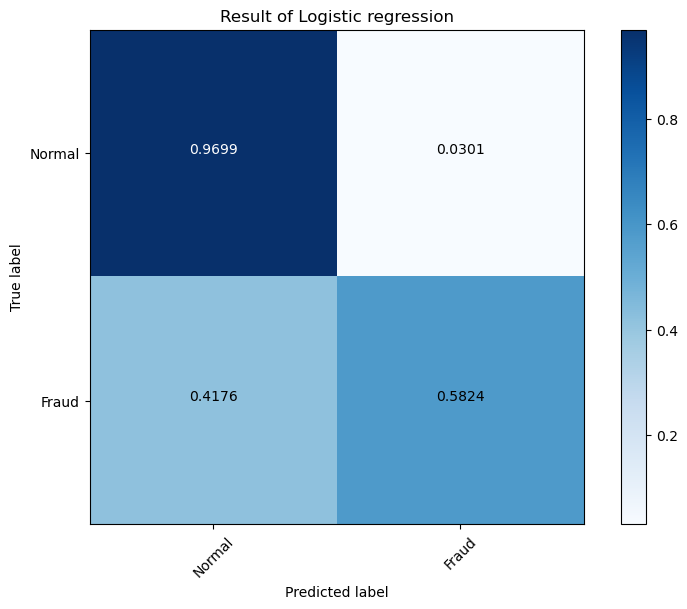

In [63]:
cm = confusion_matrix(y_test, lr_model.predict(X_test), normalize='true')
plot_confusion_matrix(cm, ['Normal', 'Fraud'], title='Result of Logistic regression')

Conclusion about Logistic regression with SMOTE </br>
- It shows that more growth than before test in #3-1-1.
- But, Still Logistic regression showed low performance about this dataset.

#### #3-2-1) [Model2] Random Forest with data imbalance

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
X_train, X_test, y_train, y_test = db_prepare(X, Y)

In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

- Actually, Actually, This Random forest model is not optimize structure. Like this structure cause the overfitting about train-set, because of unlimited max depth.
- But, This section is just test, So I will try to optimize parameter for general performance.

In [67]:
y_pred = rf_model.predict(X_test)
metric_result(y_test, y_pred)

Accuracy: 94.43%
Normal class result
--- Precision: 95.44%
--- Recall: 98.56%
--- Fscore: 96.98%
Fraud class result
--- Precision: 79.48%
--- Recall: 54.16%
--- Fscore: 64.42%


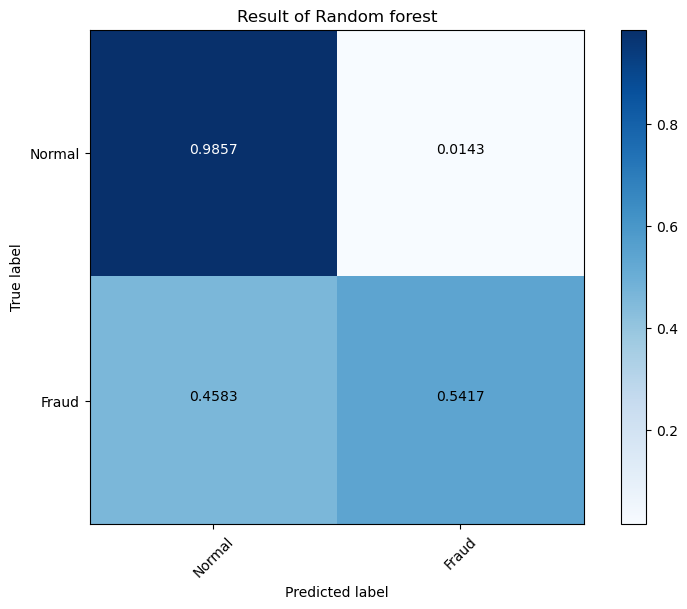

In [68]:
cm = confusion_matrix(y_test, rf_model.predict(X_test), normalize='true')
plot_confusion_matrix(cm, ['Normal', 'Fraud'], title='Result of Random forest')

Conclusion about Random forest </br>
- It shows that there is a large difference in performance between Normal and Fraud class.
- I think that this issue related with data imbalance.

#### #3-2-2) [Model2] Random Forest with Upsampling for data imbalance

In [69]:
x, y = SMOTE_data(X, Y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [72]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [73]:
y_pred = rf_model.predict(X_test)
metric_result(y_test, y_pred)

Accuracy: 90.55%
Normal class result
--- Precision: 91.83%
--- Recall: 88.98%
--- Fscore: 90.38%
Fraud class result
--- Precision: 89.35%
--- Recall: 92.12%
--- Fscore: 90.71%


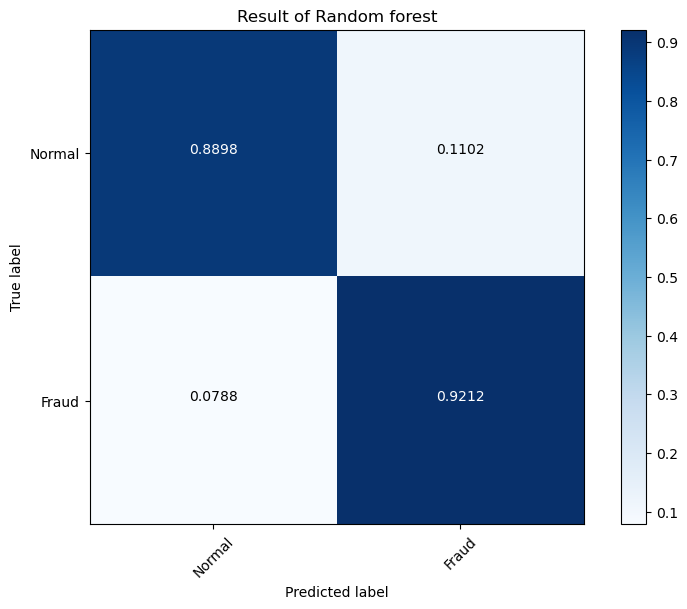

In [74]:
cm = confusion_matrix(y_test, rf_model.predict(X_test), normalize='true')
plot_confusion_matrix(cm, ['Normal', 'Fraud'], title='Result of Random forest')

Conclusion about Random forest with SMOTE </br>
- It shows that more growth than before test in #3-2-1.
- This model's performance showed fine metric result.
- But I tried to more upgrade performance through Grid search

#### #3-2-3) [Model2] Random forest with Optimize Hyper-parameter thourgh Grid-Search

In [75]:
# Grid search 
from sklearn.model_selection import GridSearchCV

In [76]:
rf_model = RandomForestClassifier()
params = { 'n_estimators' : [10, 100],
           'max_depth' : [5, 20, 30],
           'min_samples_leaf' : [1, 2, 5],
           'min_samples_split' : [5, 10]
            }

In [77]:
grid =  GridSearchCV(estimator=rf_model,  
                     param_grid= params,  
                     cv = 3, # cross validation
                     n_jobs=-1, # Using all processor for parallel
                     verbose=4
                     )

In [78]:
# Train Grid search with SMOTE dataset
grid.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.787 total time=   0.3s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.785 total time=   0.3s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.780 total time=   0.4s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.780 total time=   0.3s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.787 total time=   0.3s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.783 total time=   0.3s
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.771 total time=   0.4s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.781 total time=   0.3s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 100]},
             verbose=4)

In [79]:
print('Optimize Hyper-Parameter: ', grid.best_params_)
print('Best result accuracy: {:.4f}'.format(grid.best_score_))

Optimize Hyper-Parameter:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best result accuracy: 0.8907


In [80]:
best_params = grid.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
rf_optpara_model = RandomForestClassifier(criterion=best_params["criterion"],
                            max_depth=best_params['max_depth'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            min_samples_split=best_params['min_samples_split'],
                            n_estimators=best_params['n_estimators']
                            )
rf_optpara_model.fit(X_train, y_train.ravel())
print(
    " score train : ", np.round(rf_optpara_model.score(X_train, y_train.ravel()),5),
    " score test : " , np.round(rf_optpara_model.score(X_test, y_test),5)
)

 score train :  0.94163  score test :  0.90215


In [82]:
y_pred = rf_optpara_model.predict(X_test)
metric_result(y_test, y_pred)

Accuracy: 90.21%
Normal class result
--- Precision: 90.32%
--- Recall: 90.03%
--- Fscore: 90.17%
Fraud class result
--- Precision: 90.10%
--- Recall: 90.39%
--- Fscore: 90.25%


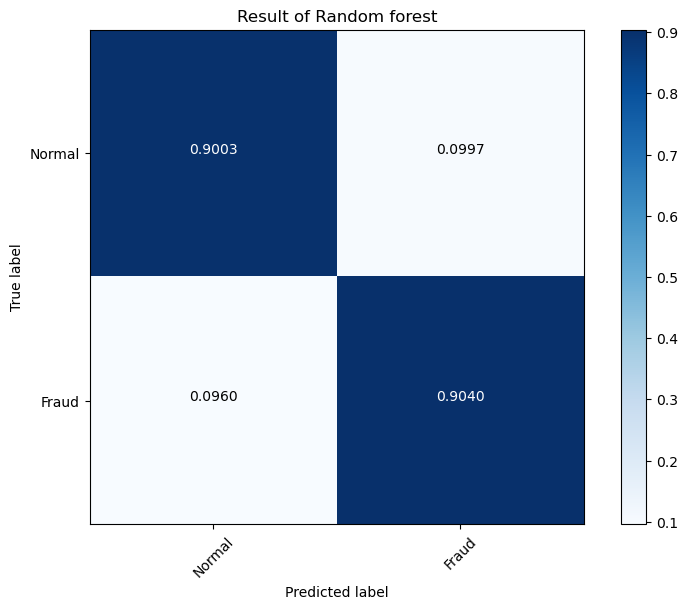

In [83]:
cm = confusion_matrix(y_test, rf_optpara_model.predict(X_test), normalize='true')
plot_confusion_matrix(cm, ['Normal', 'Fraud'], title='Result of Random forest')

Conclusion about Random forest with optimize Hyper-parameter </br>
- It shows that similar performance with #3-2-2.
- But I tried to optimize hyper parameter for random forset.
- Because, Before test, my random forest model dosen't have any controll about parameter.
- This setting cause the overfitting.
- So I tried to optimize hyper-para through the Grid search, and I setted parameter combination.

## #4) Feature Importance about Random forest

In [84]:
# Shapley value(SHAP): The Shapley value is the average marginal contribution of a feature value across all possible combination.
import shap

In [85]:
# Downsampling dataset for SHAP algorithm computation
random_idx = np.arange(0, len(X_train))
random_idx = np.random.choice(random_idx, int(round(len(random_idx)/250)), replace=False)
random_idx = np.sort(random_idx)

X_train_random = X_train[random_idx]

In [86]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rf_optpara_model)

In [87]:
shap_values = np.array(explainer.shap_values(X_train_random))

In [88]:
shap_values_ = shap_values.transpose((1,0,2))

In [89]:
from shap import summary_plot

#### #4-1) For "Fraud" Class label SHAP result

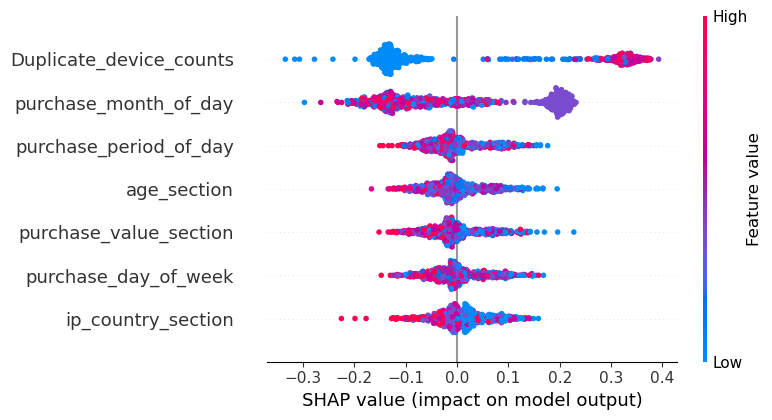

In [95]:
summary_plot(shap_values[1],X_train_random, feature_names=df_copy.columns[1:], class_names=['Normal', 'Fraud'])

- For features "Duplicate device counts"  high values tend to result in higher SHAP values (hence higher probability of the class label)
- For features "purchase month of day" and "purchase period of day"  lower values tend to result in higher SHAP values (hence higher probability of the class label)

#### #4-2) For "Normal" Class label SHAP result

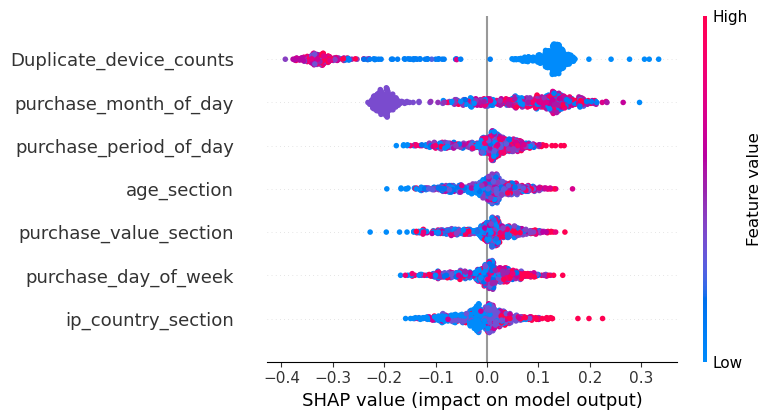

In [99]:
summary_plot(shap_values[0], X_train_random, feature_names=df_copy.columns[1:], class_names=['Normal', 'Fraud'])

- For features "Duplicate device counts"  low values tend to result in higher SHAP values (hence higher probability of the class label)
- For features "purchase month of day" and "purchase period of day"  high values tend to result in higher SHAP values (hence higher probability of the class label)

## 5) Conclusion

The final random forest model shows around 90% accuracy/ </br>
and the importance feature is duplicate device counts and purchase month of day and purchase period of day. </br>

Lastly, if I will try feature engineering more that now, I will be able to grower performance.